# Real-World Problem Statement:
"Analyzing Housing Affordability and Market Dynamics in Malaysia: A Machine Learning Approach to Price Prediction and Market Segmentation"

This problem is significant because:

- Housing affordability is a major concern in Malaysia
- Property investors need data-driven insights
- Urban planners need to understand market trends
- Policy makers need insights for housing policies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../Dataset/Project/malaysia_house_price_data_2025.csv')

df_processed = df.copy()

In [2]:
# Data types and missing values
print("\n=== Data Types and Missing Values ===")
missing_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Missing Percentage': (df.isnull().sum() / len(df) * 100).round(2)
    })
print(missing_info)


=== Data Types and Missing Values ===
             Data Type  Missing Values  Missing Percentage
Township        object               0                 0.0
Area            object               0                 0.0
State           object               0                 0.0
Tenure          object               0                 0.0
Type            object               0                 0.0
Median_Price   float64               0                 0.0
Median_PSF     float64               0                 0.0
Transactions     int64               0                 0.0


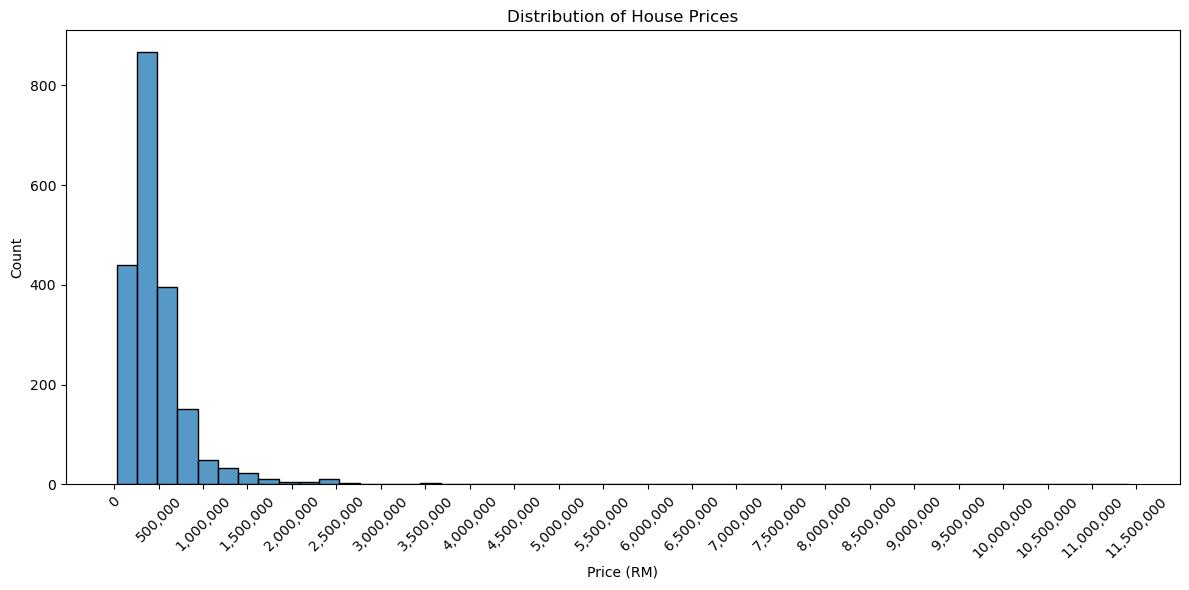

In [3]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Median_Price', bins=50)
plt.title('Distribution of House Prices')
plt.xlabel('Price (RM)')

# Create custom price intervals every 500,000 RM
plt.gca().set_xticks(np.arange(0, 12000000, 500000))
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in np.arange(0, 12000000, 500000)])

# Rotate labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

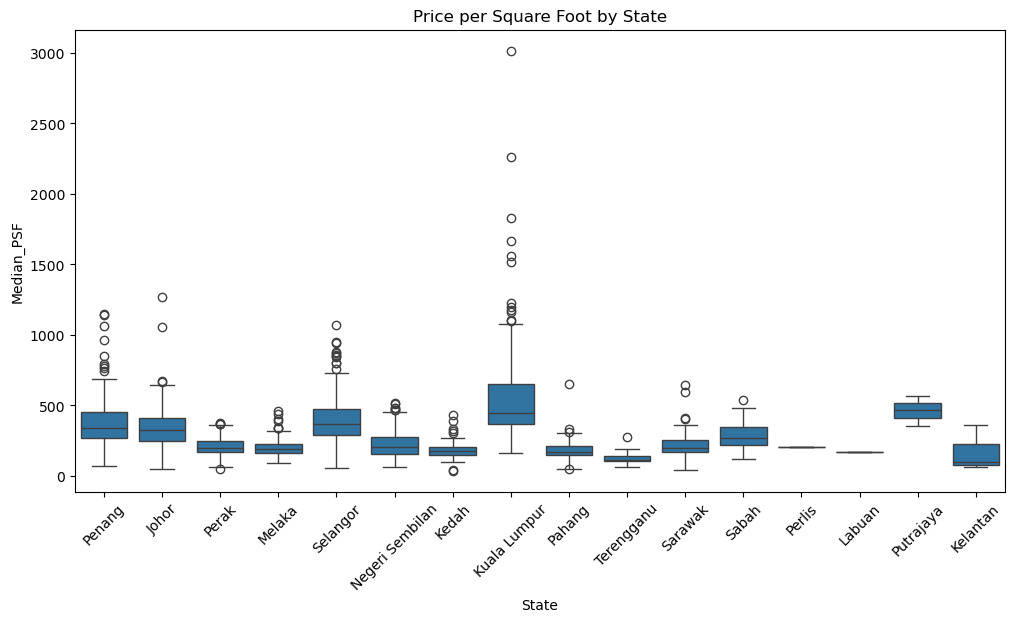

In [4]:
# Price per Square Foot Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='State', y='Median_PSF')
plt.xticks(rotation=45)
plt.title('Price per Square Foot by State')
plt.show()

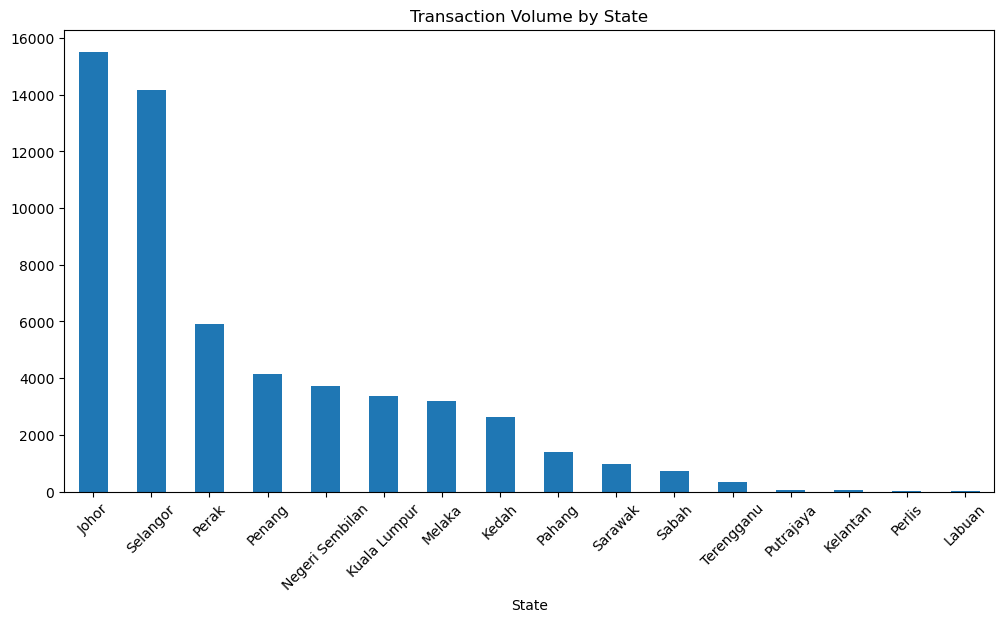

In [5]:
# Transaction Volume by State
state_transactions = df.groupby('State')['Transactions'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
state_transactions.plot(kind='bar')
plt.title('Transaction Volume by State')
plt.xticks(rotation=45)
plt.show()

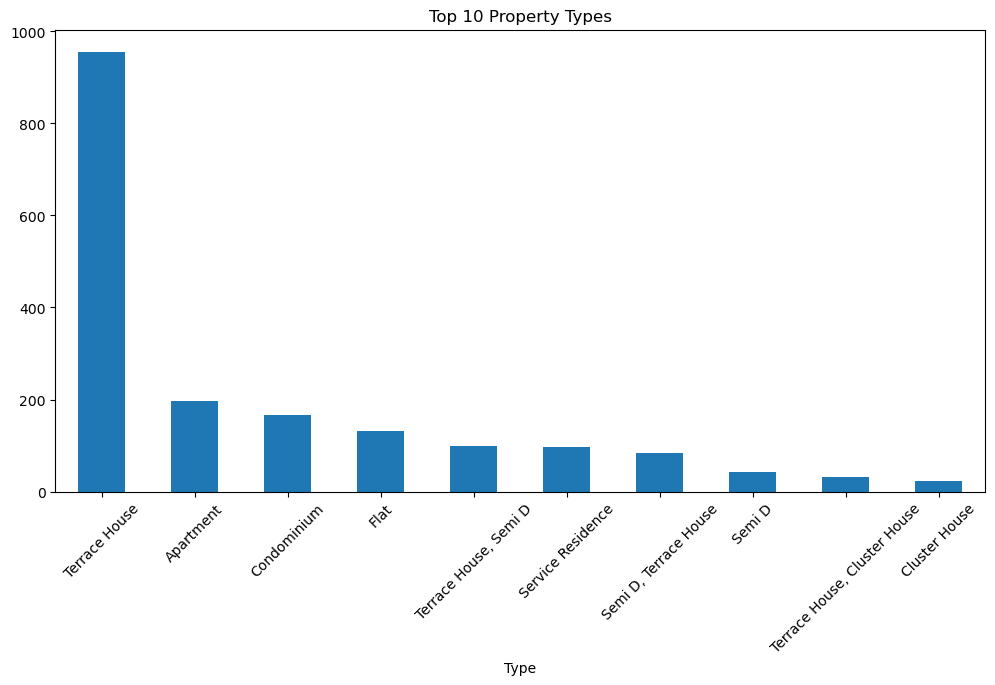

In [6]:
# Property Type Distribution
plt.figure(figsize=(12, 6))
df['Type'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Property Types')
plt.xticks(rotation=45)
plt.show()

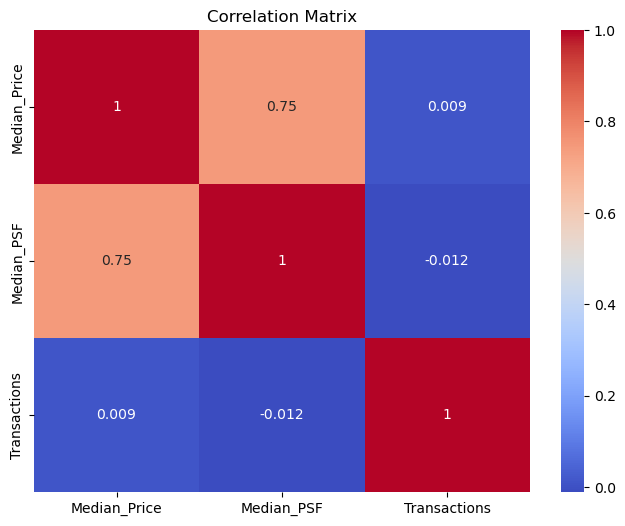

In [7]:
# Correlation Analysis
numerical_cols = ['Median_Price', 'Median_PSF', 'Transactions']
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

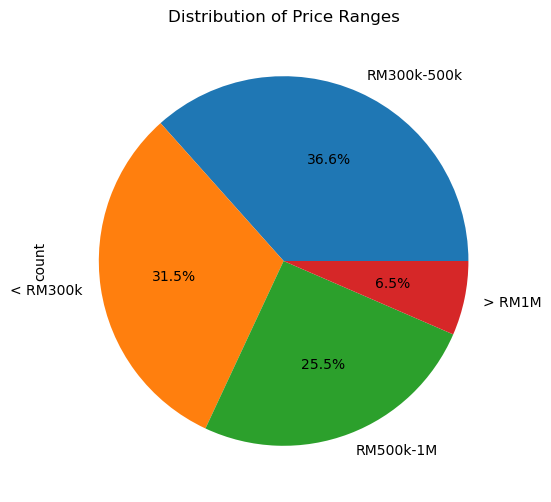

In [8]:
# Price Range Analysis
def get_price_range(price):
    if price < 300000:
        return '< RM300k'
    elif price < 500000:
        return 'RM300k-500k'
    elif price < 1000000:
        return 'RM500k-1M'
    else:
        return '> RM1M'

df['Price_Range'] = df['Median_Price'].apply(get_price_range)
plt.figure(figsize=(10, 6))
df['Price_Range'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Price Ranges')
plt.show()

In [9]:
# Top 10 Most Expensive Townships
print("\nTop 10 Most Expensive Townships:")
print(df.nlargest(10, 'Median_Price')[['Township', 'Area', 'State', 'Median_Price', 'Median_PSF']])



Top 10 Most Expensive Townships:
                                 Township               Area         State  \
1312                   Four Seasons Place               KLCC  Kuala Lumpur   
1858                  Pavilion Residences      Bukit Bintang  Kuala Lumpur   
1818                             The Oval               KLCC  Kuala Lumpur   
744                              St Regis         KL Sentral  Kuala Lumpur   
216   DAMANSARA HEIGHTS (BUKIT DAMANSARA)  Damansara Heights  Kuala Lumpur   
621                        TANJONG PINANG     Tanjong Tokong        Penang   
902                  10 Mont Kiara @ MK10         Mont Kiara  Kuala Lumpur   
1806                             18 Madge       Ampang Hilir  Kuala Lumpur   
630                  11 Mont Kiara @ MK11         Mont Kiara  Kuala Lumpur   
954                             TWIN PALM             Cheras      Selangor   

      Median_Price  Median_PSF  
1312    11420500.0      3017.0  
1858     5460000.0      1515.0  
1818    

In [10]:
# Top 10 Most Expensive Townships
print("\nTop 10 Most Expensive Townships:")
print(df.nlargest(10, 'Median_Price')[['Township', 'Area', 'State', 'Median_Price', 'Median_PSF']])



Top 10 Most Expensive Townships:
                                 Township               Area         State  \
1312                   Four Seasons Place               KLCC  Kuala Lumpur   
1858                  Pavilion Residences      Bukit Bintang  Kuala Lumpur   
1818                             The Oval               KLCC  Kuala Lumpur   
744                              St Regis         KL Sentral  Kuala Lumpur   
216   DAMANSARA HEIGHTS (BUKIT DAMANSARA)  Damansara Heights  Kuala Lumpur   
621                        TANJONG PINANG     Tanjong Tokong        Penang   
902                  10 Mont Kiara @ MK10         Mont Kiara  Kuala Lumpur   
1806                             18 Madge       Ampang Hilir  Kuala Lumpur   
630                  11 Mont Kiara @ MK11         Mont Kiara  Kuala Lumpur   
954                             TWIN PALM             Cheras      Selangor   

      Median_Price  Median_PSF  
1312    11420500.0      3017.0  
1858     5460000.0      1515.0  
1818    

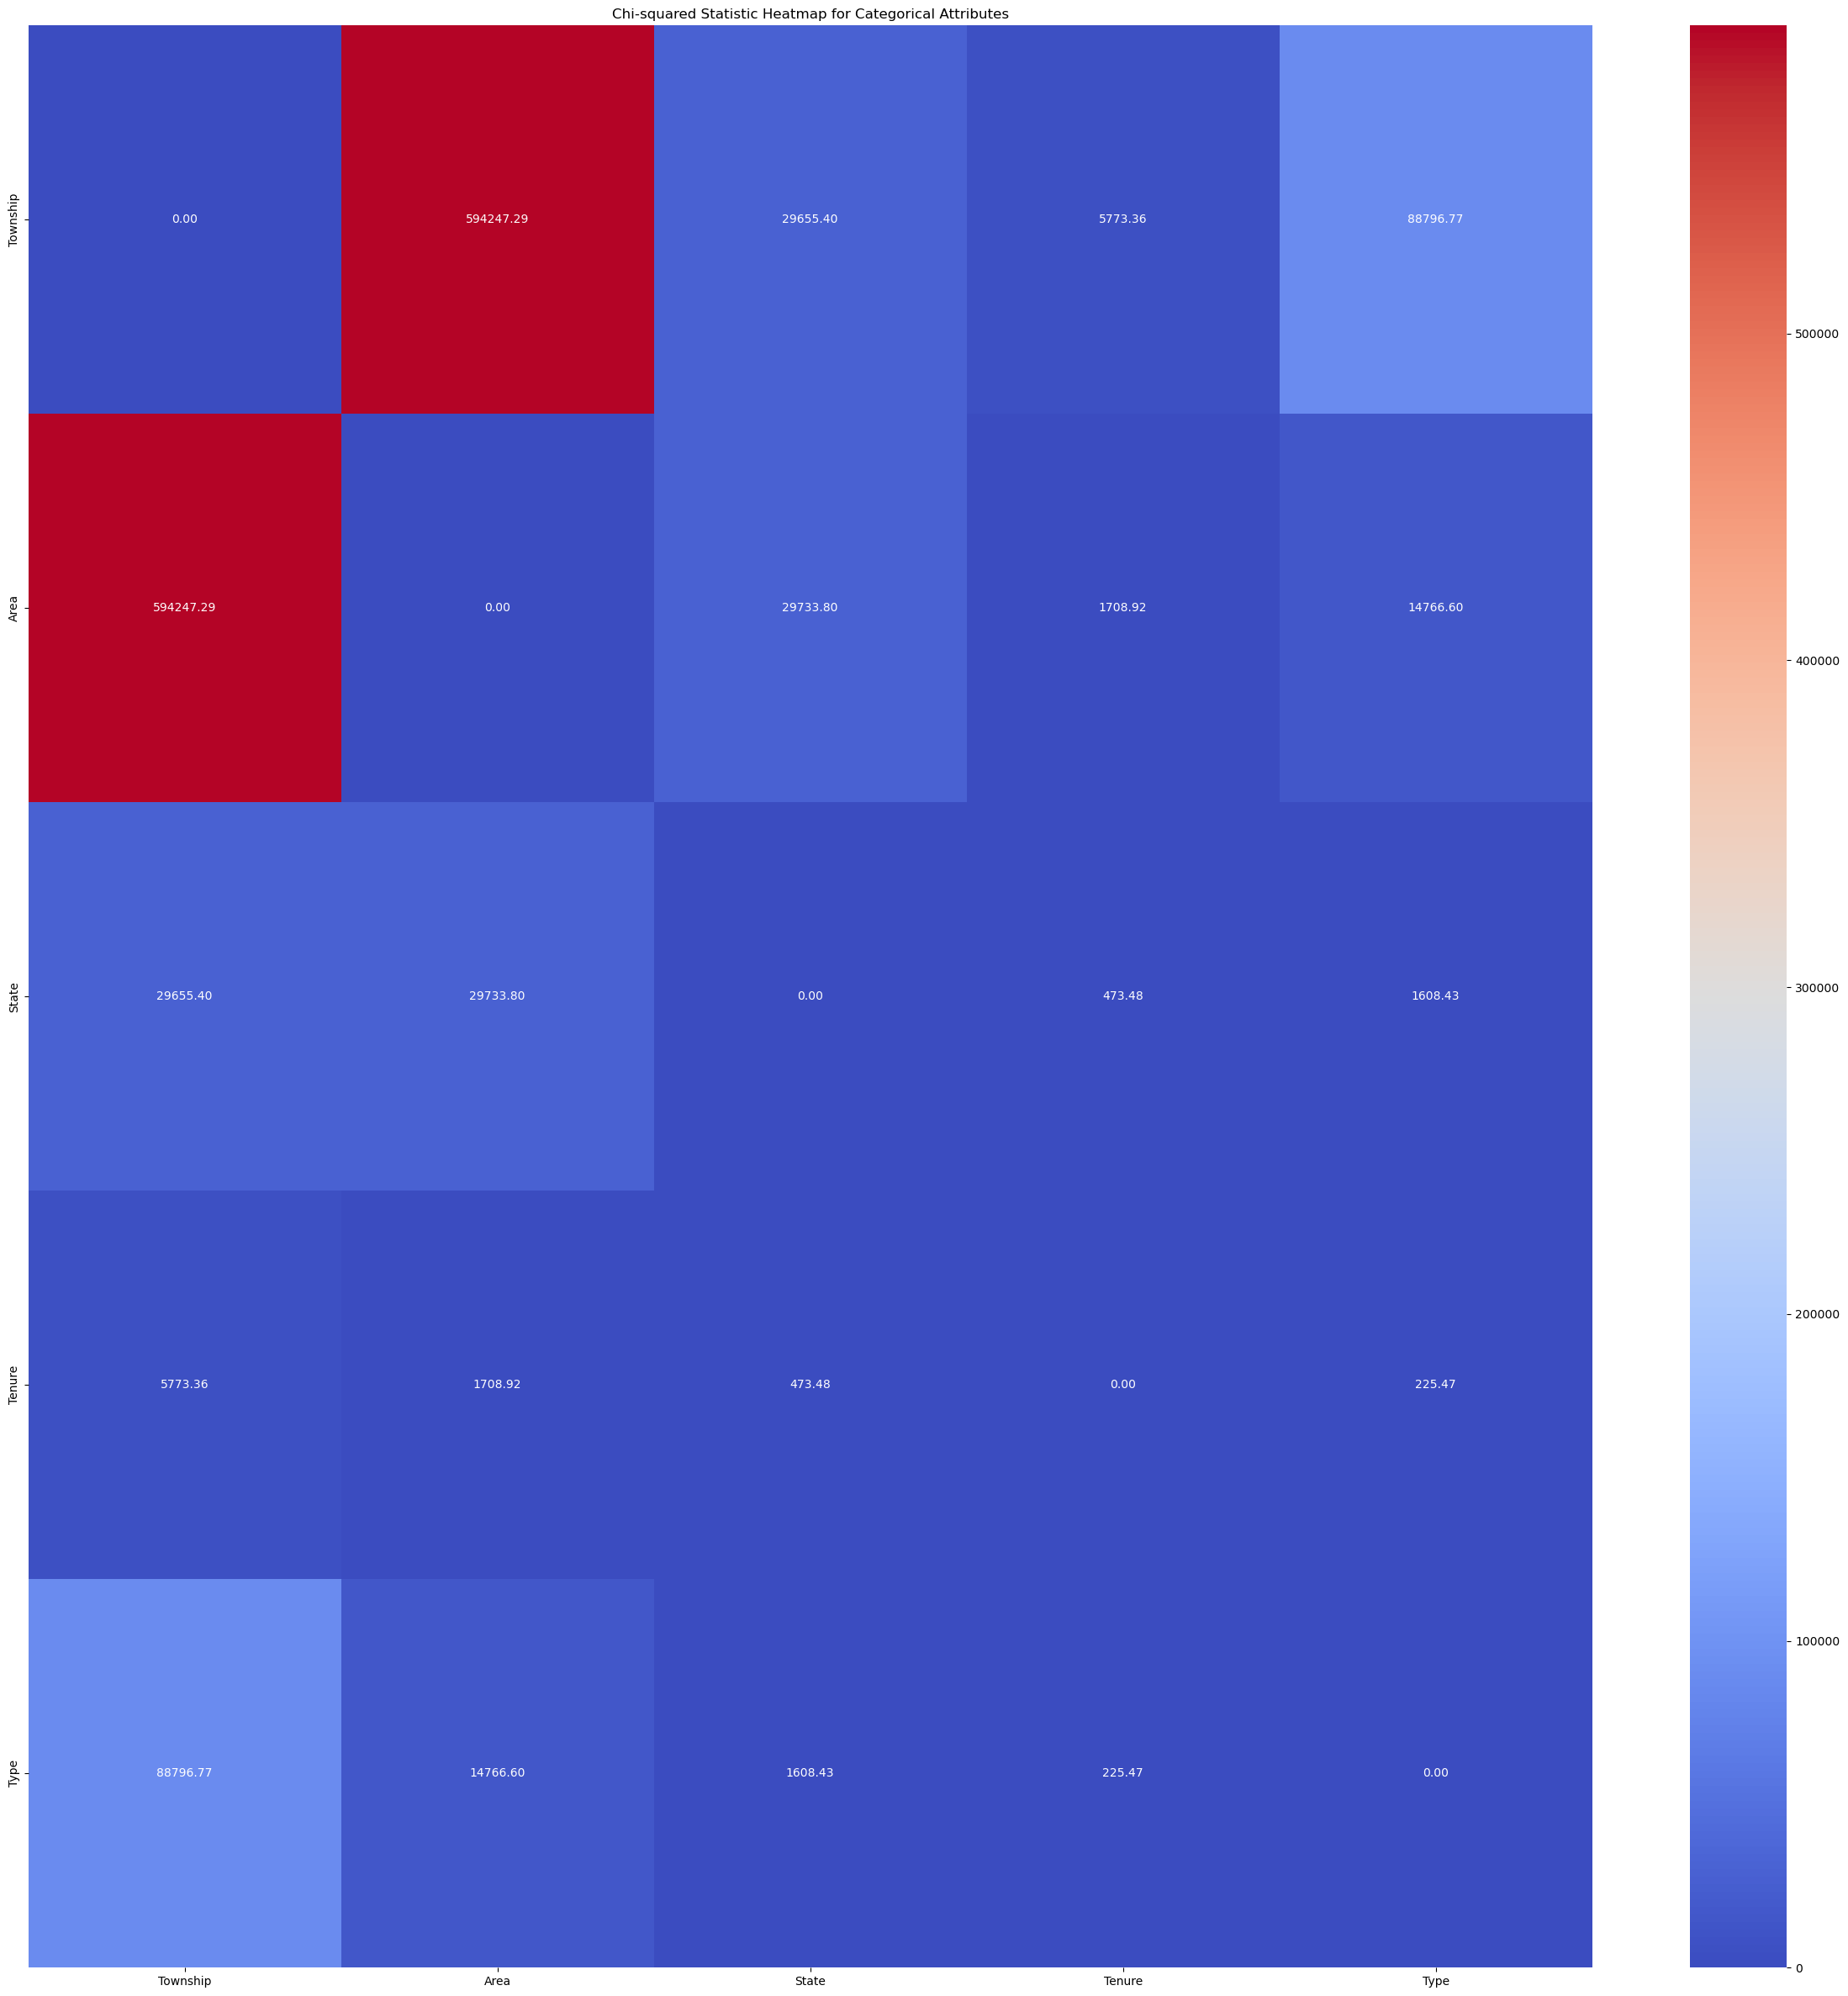

In [11]:
categorical_data_columns = df_processed.select_dtypes(include=['object']).columns

from scipy.stats import chi2_contingency
# Initialize an Empty Matrix
chi2_matrix = pd.DataFrame(index=categorical_data_columns, columns=categorical_data_columns, dtype=float)

# Compute Chi-squared Statistics
for col1 in categorical_data_columns:
    for col2 in categorical_data_columns:
        if col1 == col2:
            chi2_matrix.loc[col1, col2] = np.nan  # Avoid self-comparison
        else:
            contingency_table = pd.crosstab(df[col1], df[col2])
            if contingency_table.size > 0:
                chi2, _, _, _ = chi2_contingency(contingency_table)
                chi2_matrix.loc[col1, col2] = chi2
            else:
                chi2_matrix.loc[col1, col2] = 0

# Clean the Matrix
chi2_matrix = chi2_matrix.fillna(0)  # Replace NaN with 0
chi2_matrix = chi2_matrix.loc[(chi2_matrix != 0).any(axis=1), (chi2_matrix != 0).any(axis=0)]  # Remove invalid rows/cols

# Check if the matrix is empty
if chi2_matrix.empty:
    print("Chi2 matrix is empty. No heatmap will be plotted.")
else:
    # Plot the Heatmap
    plt.figure(figsize=(30, 30))
    sns.heatmap(chi2_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Chi-squared Statistic Heatmap for Categorical Attributes")
    plt.show()

In [12]:
# Market value indicator
df_processed['total_market_value'] = df_processed['Median_Price']*df_processed['Transactions']

# Price segments
df_processed['price_segment'] = pd.qcut(df_processed['Median_Price'], 
                                        q=5, 
                                        labels=['Very Low','Low', 'Medium', 'High', 'Very High'])
# Price per transaction (indicates market activity)
df_processed['value_per_transaction'] = df_processed['total_market_value'] / df_processed['Transactions']

In [13]:
# 2. Property Type Features
# ------------------------
# Simplify property types
def categorize_property(property_type):
        if pd.isna(property_type):
            return 'Unknown'
        property_type = property_type.lower()
        if 'bungalow' in property_type:
            return 'Luxury'
        elif 'semi d' in property_type or 'duplex' in property_type:
            return 'High-End'
        elif 'terrace' in property_type or 'cluster' in property_type:
            return 'Mid-Range'
        elif 'apartment' in property_type or 'flat' in property_type:
            return 'Affordable'
        else:
            return 'Others'
    
df_processed['property_category'] = df_processed['Type'].apply(categorize_property)

In [14]:
# 3. Location Features
# -------------------
# State level metrics
state_metrics = df_processed.groupby('State').agg({
    'Median_Price': 'mean',
        'Transactions': 'sum',
        'Median_PSF': 'mean'
    }).reset_index()
# Create state-level price indices
state_price_map = dict(zip(state_metrics['State'], 
                              state_metrics['Median_Price'] / state_metrics['Median_Price'].mean()))
df_processed['state_price_index'] = df_processed['State'].map(state_price_map)
    
# Area level metrics
area_metrics = df_processed.groupby('Area').agg({
        'Median_Price': 'mean',
        'Transactions': 'sum',
        'Median_PSF': 'mean'
    }).reset_index()
    
# Create area development index
area_dev_map = dict(zip(area_metrics['Area'], 
                           area_metrics['Transactions'] / area_metrics['Transactions'].mean()))
df_processed['area_development_index'] = df_processed['Area'].map(area_dev_map)
    

In [15]:
# 4. Market Activity Features
# --------------------------
# Transaction volume categories
df_processed['transaction_volume'] = pd.qcut(df_processed['Transactions'], 
                                                q=5, 
                                                labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
    
# Market activity score (combines price and transaction volume)
df_processed['market_activity_score'] = (
        (df_processed['Median_Price'] / df_processed['Median_Price'].mean()) * 
        (df_processed['Transactions'] / df_processed['Transactions'].mean())
)

In [16]:
# 5. Tenure Features
    # -----------------
def process_tenure(tenure):
        if pd.isna(tenure):
            return 'Unknown'
        tenure = tenure.lower()
        if 'freehold' in tenure and 'leasehold' not in tenure:
            return 'Freehold'
        elif 'leasehold' in tenure and 'freehold' not in tenure:
            return 'Leasehold'
        else:
            return 'Mixed'
    
df_processed['tenure_simplified'] = df_processed['Tenure'].apply(process_tenure)

In [17]:
# 6. Price-to-Market Features
# --------------------------
# Price deviation from state average
df_processed['price_deviation_state'] = (
        df_processed['Median_Price'] / df_processed.groupby('State')['Median_Price'].transform('mean')
    )
    
# Price deviation from area average
df_processed['price_deviation_area'] = (
        df_processed['Median_Price'] / df_processed.groupby('Area')['Median_Price'].transform('mean')
    )

In [18]:
# 7. Market Position Features
    # --------------------------
    # Relative price position in area
df_processed['price_percentile_area'] = df_processed.groupby('Area')['Median_Price'].transform(
        lambda x: pd.qcut(x, q=10, labels=False, duplicates='drop')
)

df_processed['price_percentile_area'] = df_processed['price_percentile_area'].map({
        0: 'P1', 1: 'P2', 2: 'P3', 3: 'P4', 4: 'P5',
        5: 'P6', 6: 'P7', 7: 'P8', 8: 'P9', 9: 'P10'
})

In [19]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = [
        'price_segment', 'property_category', 'tenure_simplified', 
        'transaction_volume', 'price_percentile_area'
    ]
    
# Initialize label encoders
encoders = {}
    
# Encode categorical variables
for col in categorical_columns:
    encoders[col] = LabelEncoder()
    df_processed[col + '_encoded'] = encoders[col].fit_transform(df_processed[col])

In [20]:
print(len(df.columns))
print(len(df_processed.columns))

9
25


In [21]:
display(df_processed['Median_Price'])

0       331800.0
1       590900.0
2       229954.0
3       255600.0
4       219300.0
          ...   
1995    655000.0
1996    337500.0
1997    290000.0
1998    480000.0
1999    449000.0
Name: Median_Price, Length: 2000, dtype: float64

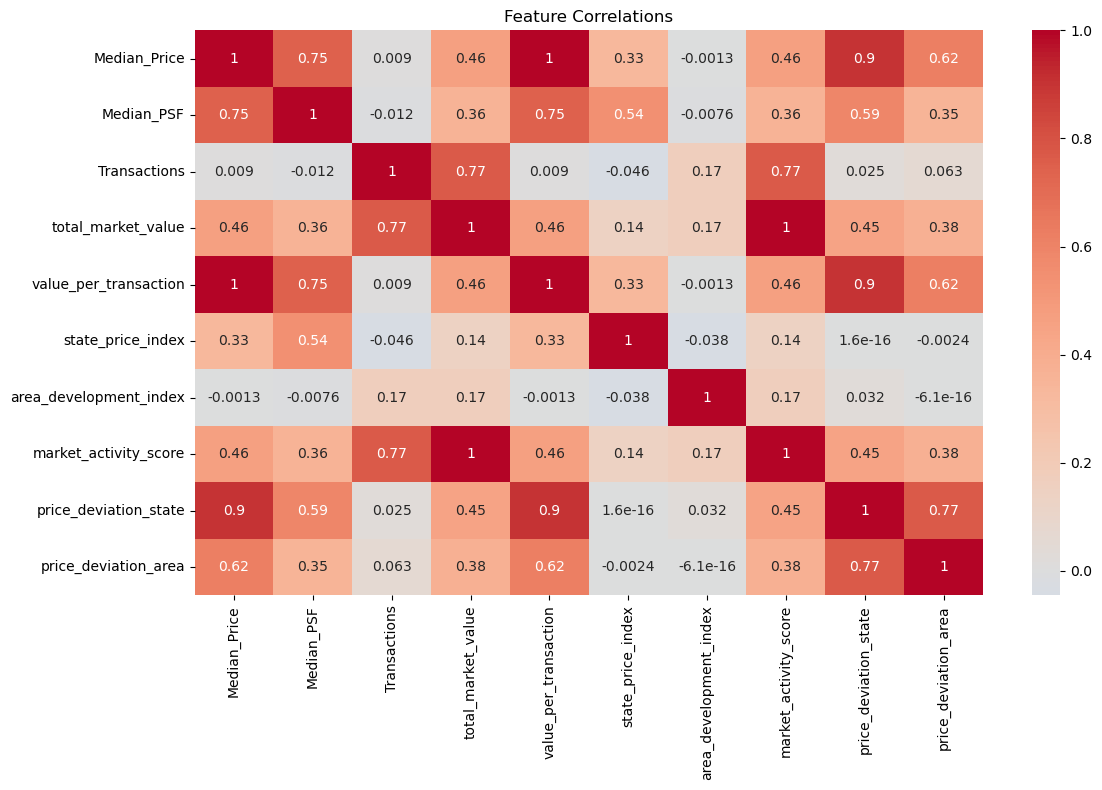

In [22]:
numeric_columns = df_processed.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_processed[numeric_columns].corr()

# Visualize correlations
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlations')
plt.tight_layout()
plt.show()

In [23]:
features_to_remove = [
    'value_per_transaction',  # Same as Median_Price
    'market_activity_score',  # Same as total_market_value
    'price_deviation_state',  # Highly correlated with Median_Price
    'Median_Price'  # Keep Median_PSF instead as it's normalized by size
]

numeric_features_for_pca = [
    'Median_PSF',
    'Transactions',
    'total_market_value',
    'state_price_index',
    'area_development_index',
    'price_deviation_area'
]

# Keep categorical features (encoded versions) for potential use
categorical_features_encoded = [
    'price_segment_encoded',
    'property_category_encoded',
    'tenure_simplified_encoded',
    'transaction_volume_encoded',
    'price_percentile_area_encoded'
]

df_processed = df_processed[numeric_features_for_pca + categorical_features_encoded]

print(df_processed)

      Median_PSF  Transactions  total_market_value  state_price_index  \
0          304.0           593         196757400.0           1.136075   
1          322.0           519         306677100.0           1.157911   
2          130.0           414          95200956.0           0.785270   
3          218.0           391          99939600.0           0.786748   
4          168.0           363          79605900.0           0.785270   
...          ...           ...                 ...                ...   
1995       410.0            10           6550000.0           1.419001   
1996       224.0            10           3375000.0           0.785270   
1997       195.0            10           2900000.0           0.785270   
1998       272.0            10           4800000.0           0.891392   
1999       261.0            10           4490000.0           0.785270   

      area_development_index  price_deviation_area  price_segment_encoded  \
0                   3.435399              1.00

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_processed[numeric_features_for_pca] = scaler.fit_transform(df_processed[numeric_features_for_pca])

In [25]:
print(df_processed)

      Median_PSF  Transactions  total_market_value  state_price_index  \
0      -0.128666     14.987110            8.306891          -0.094800   
1      -0.035514     13.023878           13.301526          -0.036378   
2      -1.029131     10.238212            3.692274          -1.033369   
3      -0.573723      9.628018            3.907593          -1.029415   
4      -0.832478      8.885174            2.983651          -1.033369   
...          ...           ...                 ...                ...   
1995    0.419894     -0.479970           -0.335931           0.662160   
1996   -0.542673     -0.479970           -0.480200          -1.033369   
1997   -0.692750     -0.479970           -0.501783          -1.033369   
1998   -0.294268     -0.479970           -0.415449          -0.749443   
1999   -0.351194     -0.479970           -0.429535          -1.033369   

      area_development_index  price_deviation_area  price_segment_encoded  \
0                   0.141304              0.02

In [26]:
from sklearn.decomposition import PCA

# Initialize PCA without limiting the number of components first
pca = PCA(n_components=4)
pca_result = pca.fit_transform(df_processed[numeric_features_for_pca])

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Print the results
print("Explained variance ratio by component:")
for i, var in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {var:.3f} ({cumulative_variance_ratio[i]:.3f} cumulative)")

Explained variance ratio by component:
PC1: 0.355 (0.355 cumulative)
PC2: 0.252 (0.606 cumulative)
PC3: 0.165 (0.771 cumulative)
PC4: 0.148 (0.919 cumulative)


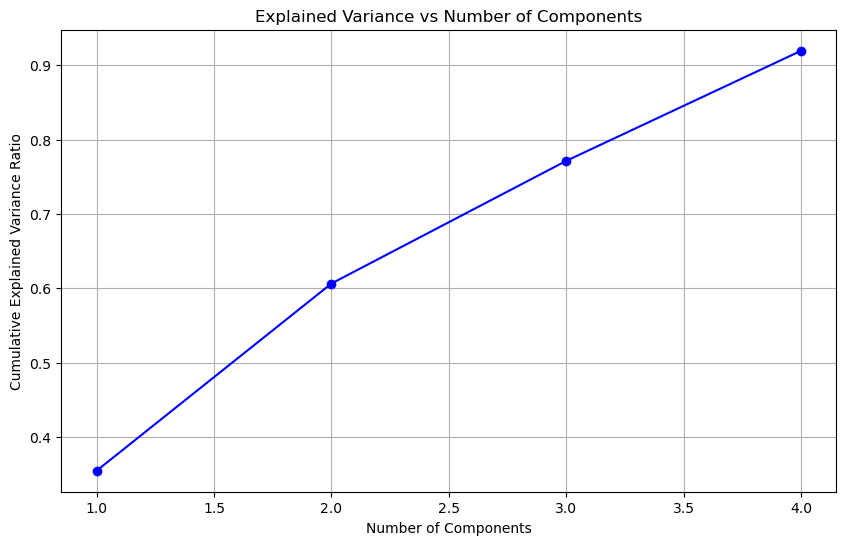

In [27]:
import matplotlib.pyplot as plt

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.show()


Feature loadings:
                             PC1       PC2       PC3       PC4
Median_PSF              0.432142  0.525460 -0.042571  0.105672
Transactions            0.449598 -0.501849 -0.109180 -0.377543
total_market_value      0.621346 -0.235788  0.034976 -0.163689
state_price_index       0.260583  0.557985 -0.480561 -0.184974
area_development_index  0.152911 -0.299423 -0.529001  0.778281
price_deviation_area    0.365731  0.124262  0.688668  0.423750


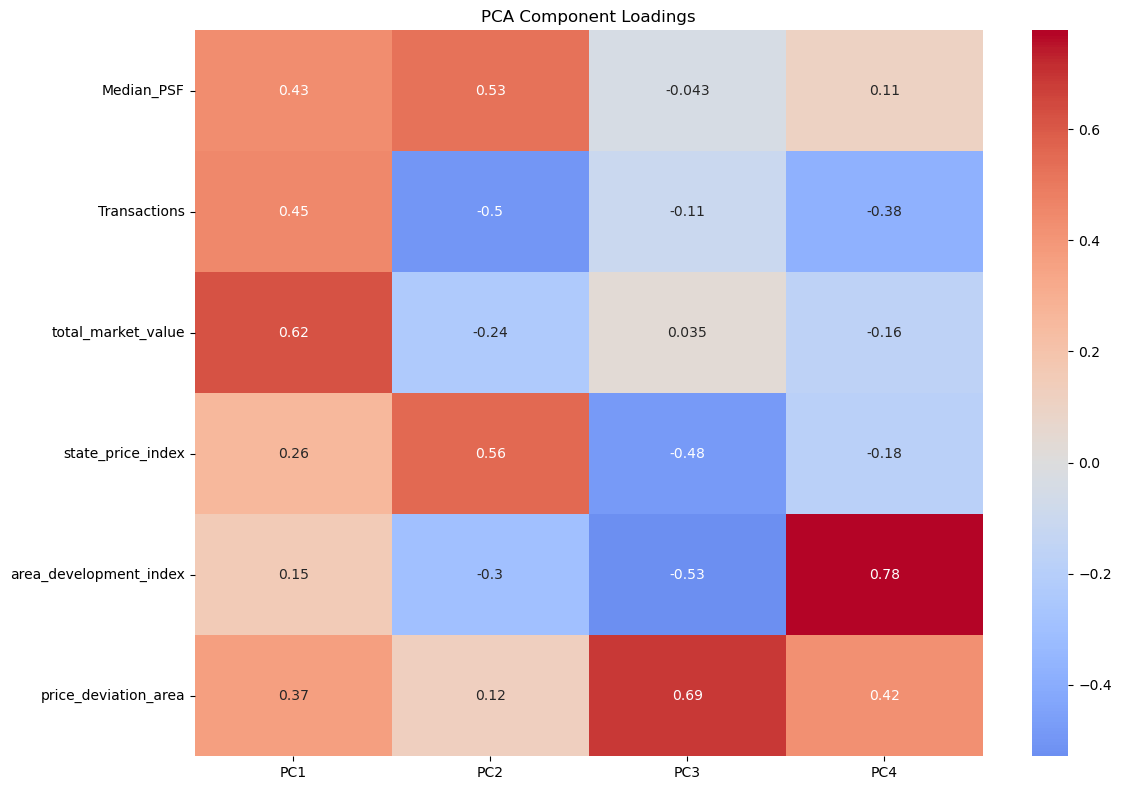

In [28]:
# Create a DataFrame of feature loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(pca.components_))],
    index=numeric_features_for_pca
)

print("\nFeature loadings:")
print(loadings)

# Visualize the loadings
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Component Loadings')
plt.tight_layout()
plt.show()

In [29]:
# Create feature matrix with PCA components and categorical features
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(4)])
X = pd.concat([pca_df, df_processed[categorical_features_encoded]], axis=1)

In [30]:
# Get target variable
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High'][:5]
y_multiclass = pd.qcut(df['Median_Price'], q = 5, labels=labels)

le = LabelEncoder()
y_encode = le.fit_transform(y_multiclass)

# Get target variable(Regression)
y_reg = df['Median_Price']

# **Logistic Regression Model Training and Evaluation**

In [31]:
# Define the features and the encoded target variable
X = pca_df
y = y_encode

In [32]:
from sklearn.model_selection import train_test_split
# Spliting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

c:\Users\User\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [34]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.605


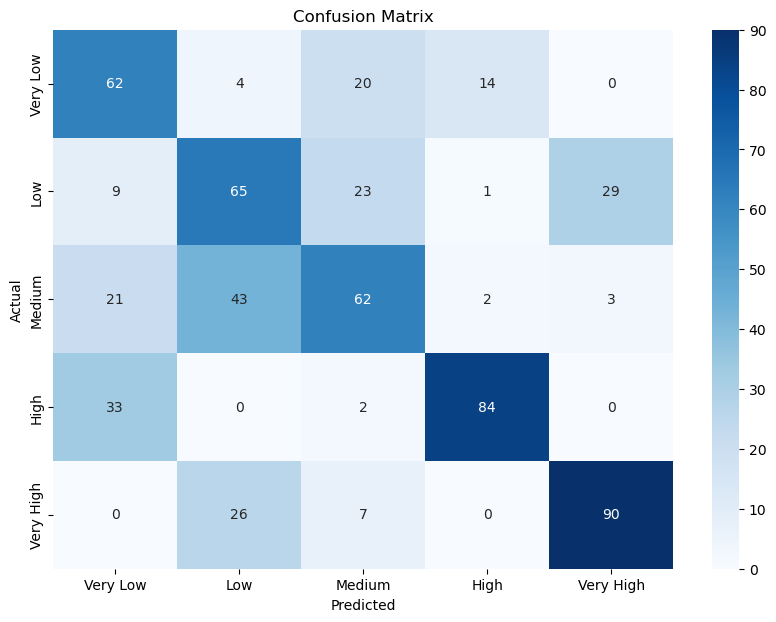

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate and plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [37]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=labels)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    Very Low       0.50      0.62      0.55       100
         Low       0.47      0.51      0.49       127
      Medium       0.54      0.47      0.51       131
        High       0.83      0.71      0.76       119
   Very High       0.74      0.73      0.73       123

    accuracy                           0.60       600
   macro avg       0.62      0.61      0.61       600
weighted avg       0.62      0.60      0.61       600



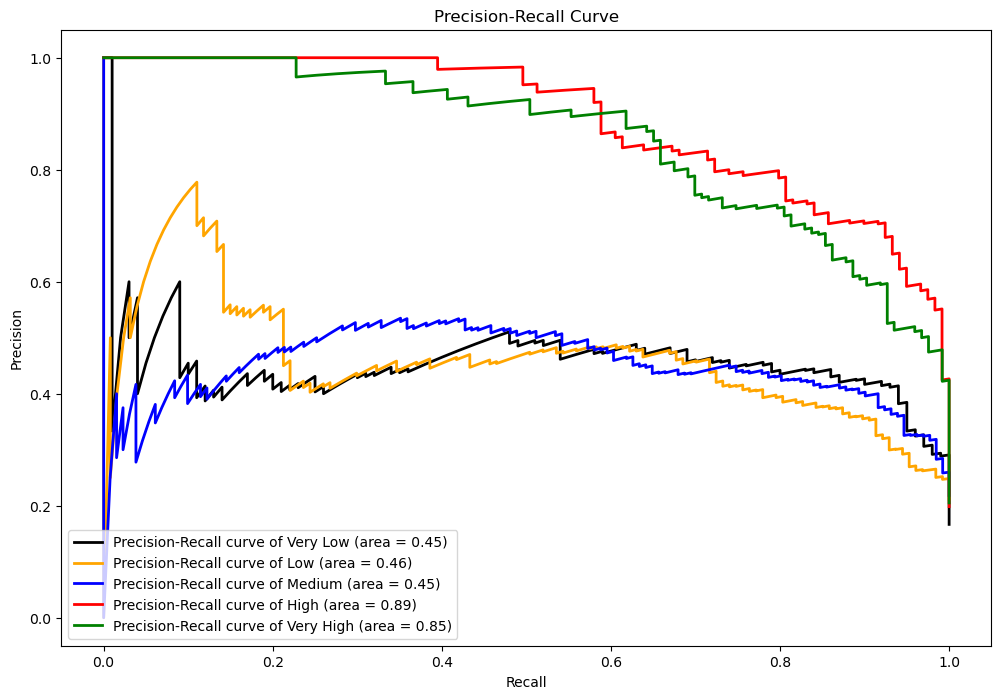

In [38]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Function to plot Precision-Recall curve
def plot_precision_recall_curve_multiclass(X_test, y_test, model, class_names):
    # Binarize the output
    y_test_bin = label_binarize(y_test, classes=[i for i in range(len(class_names))])

    # Compute Precision-Recall curve and area
    precision = dict()
    recall = dict()
    pr_auc = dict()
    for i in range(len(class_names)):
        precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], model.predict_proba(X_test)[:, i])
        pr_auc[i] = auc(recall[i], precision[i])

    # Plot Precision-Recall curve
    plt.figure(figsize=(12, 8))
    colors = cycle(['black', 'orange', 'blue', 'red', 'green'])
    for i, color in zip(range(len(class_names)), colors):
        plt.plot(recall[i], precision[i], color=color, lw=2,
                 label=f'Precision-Recall curve of {class_names[i]} (area = {pr_auc[i]:0.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

class_names = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
plot_precision_recall_curve_multiclass(X_test, y_test, model, class_names)

# **Explanation and Justification of Predictions**



*   **Understanding Market Trends:** The logistic regression model categorizes median prices into classes ('Very Low', 'Low', 'Medium', 'High', 'Very High'), helping identify market trends.
*  **Informed Decision-Making:** Businesses can leverage these predictions for pricing strategies, inventory management, and marketing efforts.
*   **Resource Allocation:** Predictions aid in efficiently allocating resources by focusing on high-potential segments.
*   **Customer Targeting:** By identifying segments with higher prices, businesses can tailor marketing strategies to target high-value customers.

# **Recommendations Based on Analysis**



*   **Targeted Marketing:** Focus on regions with 'High' or 'Very High' median prices to attract high-value customers.
*  **Pricing Strategies:** Adjust prices competitively in 'Very Low' and 'Low' segments and optimize prices in 'High' and 'Very High' segments for better margins.
*   **Inventory Management:** Allocate more inventory to regions with higher predicted prices.
*   **Product Development:** Promote premium products for higher segments and budget options for lower segments.





# **Random Forest Model Training and Evaluation**

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
X = pca_df
y = y_encode

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluate
print("Random Forest Performance:")
print(classification_report(y_test, y_pred, target_names=labels))

Random Forest Performance:
              precision    recall  f1-score   support

    Very Low       0.58      0.66      0.62        80
         Low       0.57      0.59      0.58        81
      Medium       0.49      0.43      0.46        79
        High       0.76      0.82      0.79        80
   Very High       0.88      0.74      0.80        80

    accuracy                           0.65       400
   macro avg       0.65      0.65      0.65       400
weighted avg       0.65      0.65      0.65       400



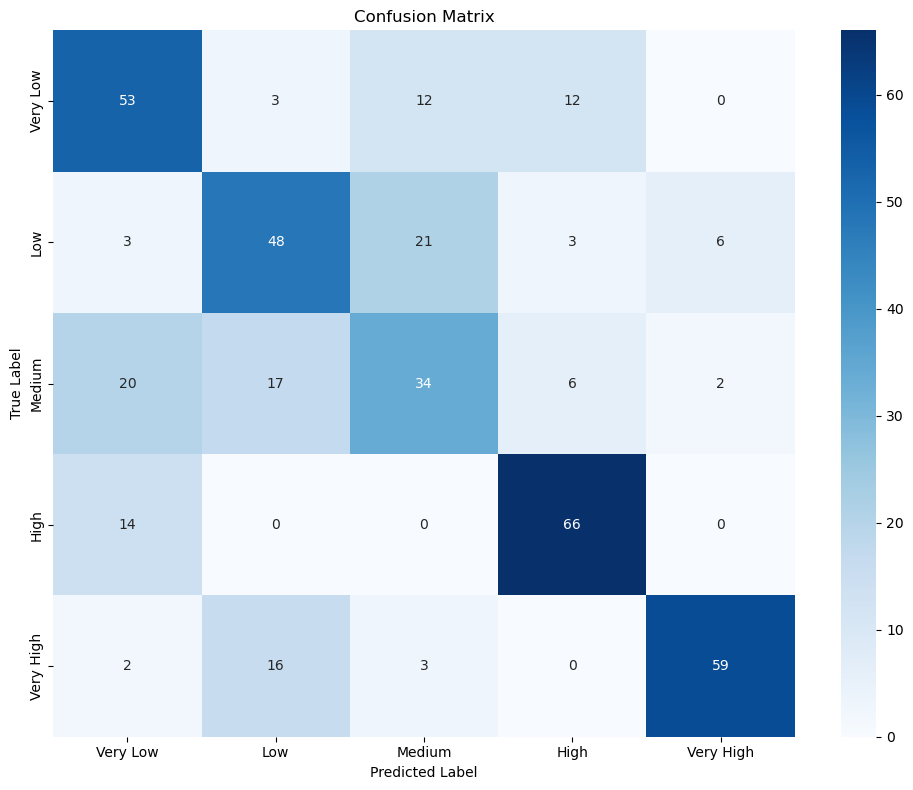

Confusion Matrix Analysis:

Overall Accuracy: 65.00%

Per-class Analysis:

Very Low:
Precision: 57.61%
Recall: 66.25%

Low:
Precision: 57.14%
Recall: 59.26%

Medium:
Precision: 48.57%
Recall: 43.04%

High:
Precision: 75.86%
Recall: 82.50%

Very High:
Precision: 88.06%
Recall: 73.75%


In [40]:
# Create and plot confusion matrix
plt.figure(figsize=(10, 8))
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Print analysis of confusion matrix
print("Confusion Matrix Analysis:")
total_predictions = np.sum(conf_matrix)
correct_predictions = np.sum(np.diag(conf_matrix))
accuracy = correct_predictions / total_predictions

print(f"\nOverall Accuracy: {accuracy:.2%}")
print("\nPer-class Analysis:")
for i, label in enumerate(labels):
    true_pos = conf_matrix[i][i]
    total_actual = np.sum(conf_matrix[i])
    total_predicted = np.sum(conf_matrix[:, i])
    
    recall = true_pos / total_actual
    precision = true_pos / total_predicted
    
    print(f"\n{label}:")
    print(f"Precision: {precision:.2%}")
    print(f"Recall: {recall:.2%}")

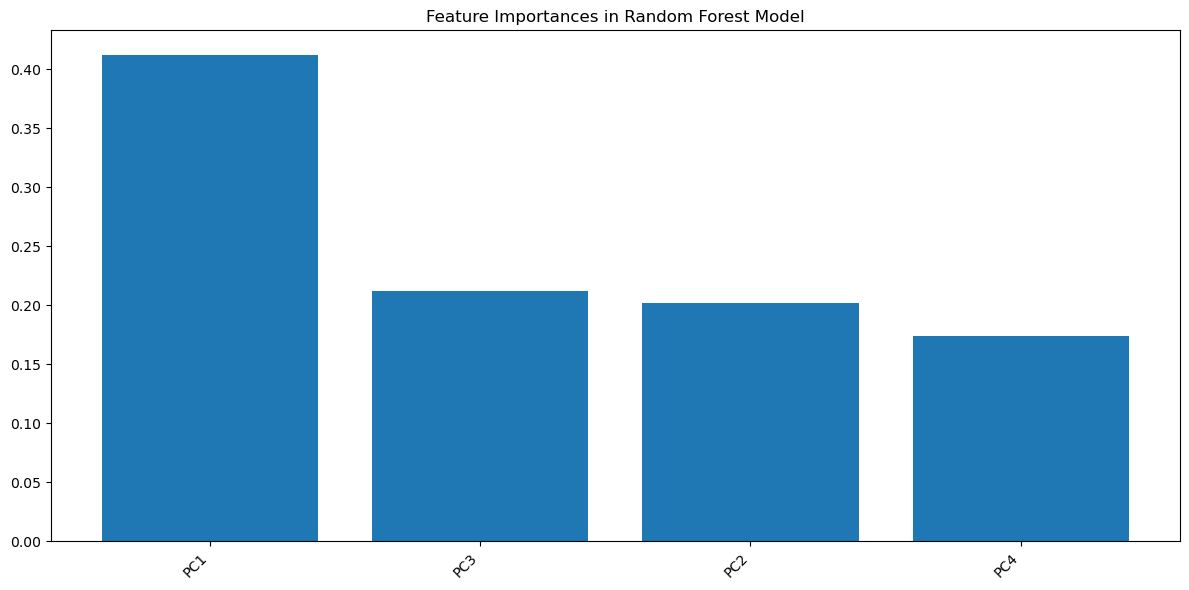

Feature Importance Analysis:

Top 5 Most Important Features:
1. PC1: 0.4123
2. PC3: 0.2121
3. PC2: 0.2017
4. PC4: 0.1739

Feature Importance Distribution:
Mean Importance: 0.2500
Median Importance: 0.2069


In [41]:
# Plot feature importance
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances in Random Forest Model')
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print feature importance analysis
print("Feature Importance Analysis:")
print("\nTop 5 Most Important Features:")
for i in range(min(5, len(indices))):
    idx = indices[i]
    print(f"{i+1}. {feature_names[idx]}: {importances[idx]:.4f}")

print("\nFeature Importance Distribution:")
print(f"Mean Importance: {np.mean(importances):.4f}")
print(f"Median Importance: {np.median(importances):.4f}")

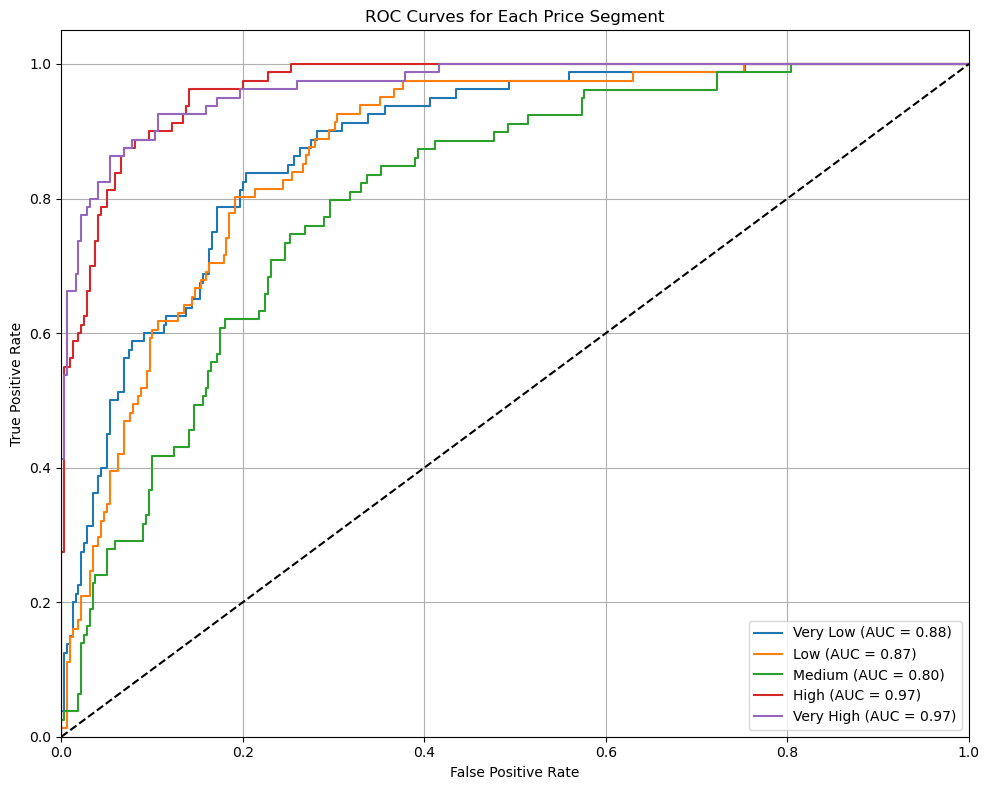

In [42]:
from sklearn.metrics import roc_curve, auc

# Plot ROC curves
plt.figure(figsize=(10, 8))
y_prob = rf_model.predict_proba(X_test)

for i, label in enumerate(labels):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Price Segment')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


# **Explanation and Justification of Predictions**

Understanding Model Performance:
- Random Forest model categorizes price segments with 0.65 overall accuracy
- High/Very High segments show strong performance (AUC = 0.97)
- Feature importance led by PC1 (41% contribution)
- Reliable segmentation shown in confusion matrix diagonal values

Prediction Importance:
1. Market Analysis: Model segments properties into five categories, enabling trend identification
2. Risk Assessment: High precision in premium segments (0.88 for Very High) aids investment decisions
3. Strategic Planning: Confusion matrix insights help optimize resource allocation
4. Customer Targeting: ROC curves (AUC 0.80-0.97) validate segment discrimination ability

# **Recommendations Based on Analysis**

Business Applications:
1. Pricing Strategy: 
   - Leverage 0.88 precision in Very High segment for premium pricing
   - Adjust pricing in Medium segment based on 0.49 precision insights

2. Resource Allocation:
   - Focus on High/Very High segments (AUC = 0.97)
   - Optimize inventory based on segment predictions

3. Risk Management:
   - Use confusion matrix for cross-segment risk assessment
   - Monitor PC1 indicators for market shifts

# **Random Forest Model Traning and Evaluation**

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
X = pca_df
y = y_encode

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluate
print("Random Forest Performance:")
print(classification_report(y_test, y_pred, target_names=labels))

Random Forest Performance:
              precision    recall  f1-score   support

    Very Low       0.58      0.66      0.62        80
         Low       0.57      0.59      0.58        81
      Medium       0.49      0.43      0.46        79
        High       0.76      0.82      0.79        80
   Very High       0.88      0.74      0.80        80

    accuracy                           0.65       400
   macro avg       0.65      0.65      0.65       400
weighted avg       0.65      0.65      0.65       400



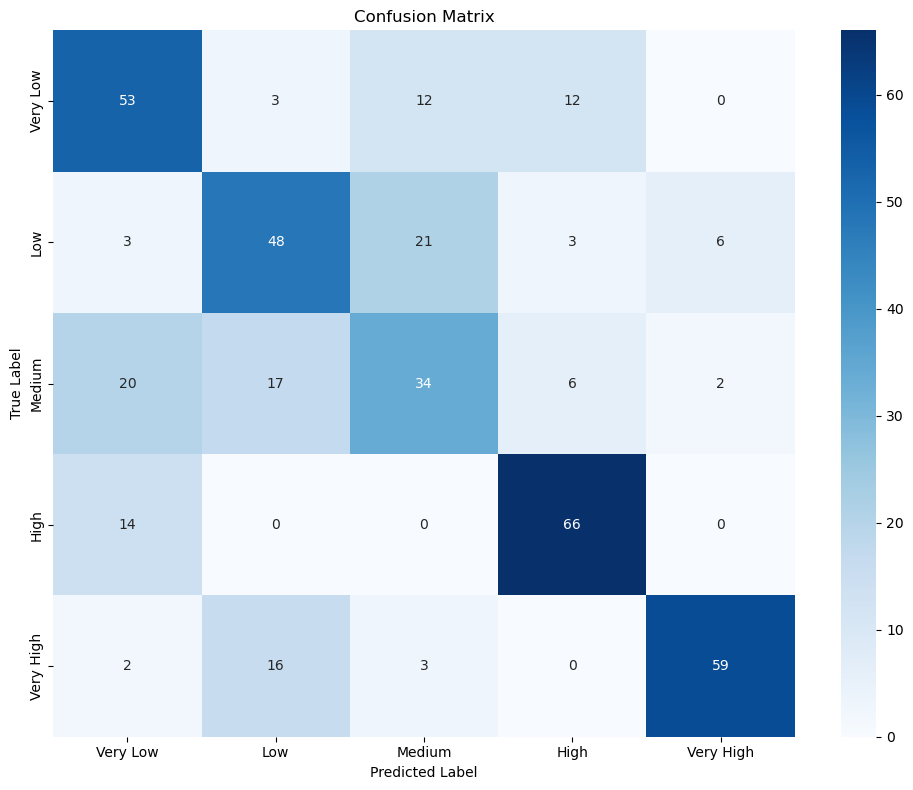

Confusion Matrix Analysis:

Overall Accuracy: 65.00%

Per-class Analysis:

Very Low:
Precision: 57.61%
Recall: 66.25%

Low:
Precision: 57.14%
Recall: 59.26%

Medium:
Precision: 48.57%
Recall: 43.04%

High:
Precision: 75.86%
Recall: 82.50%

Very High:
Precision: 88.06%
Recall: 73.75%


In [33]:
# Create and plot confusion matrix
plt.figure(figsize=(10, 8))
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Print analysis of confusion matrix
print("Confusion Matrix Analysis:")
total_predictions = np.sum(conf_matrix)
correct_predictions = np.sum(np.diag(conf_matrix))
accuracy = correct_predictions / total_predictions

print(f"\nOverall Accuracy: {accuracy:.2%}")
print("\nPer-class Analysis:")
for i, label in enumerate(labels):
    true_pos = conf_matrix[i][i]
    total_actual = np.sum(conf_matrix[i])
    total_predicted = np.sum(conf_matrix[:, i])
    
    recall = true_pos / total_actual
    precision = true_pos / total_predicted
    
    print(f"\n{label}:")
    print(f"Precision: {precision:.2%}")
    print(f"Recall: {recall:.2%}")

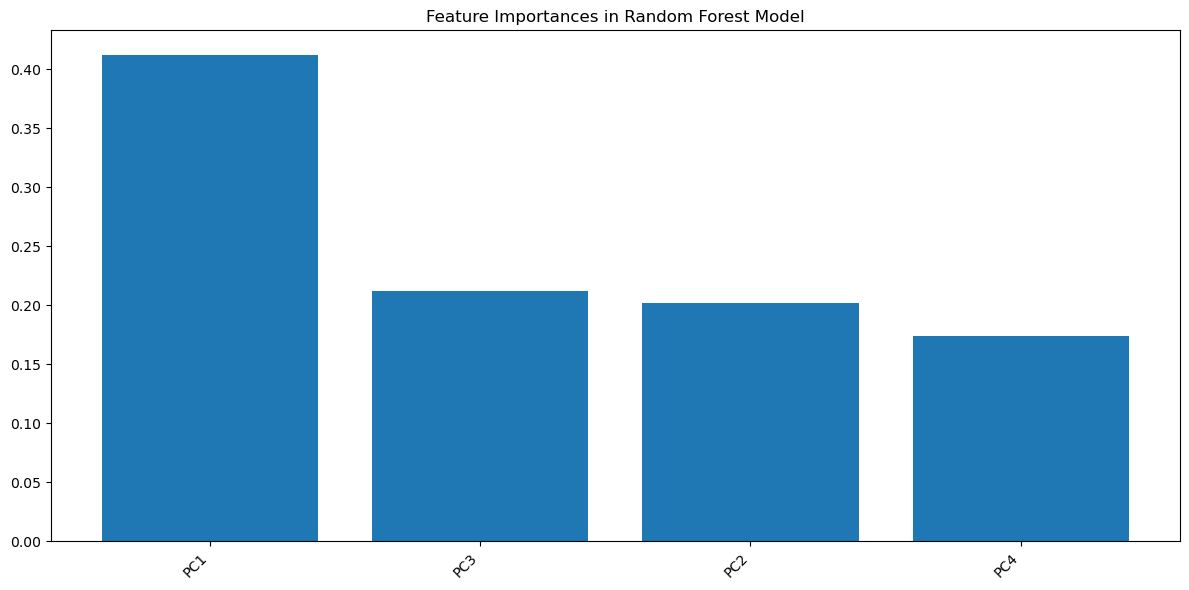

Feature Importance Analysis:

Top 5 Most Important Features:
1. PC1: 0.4123
2. PC3: 0.2121
3. PC2: 0.2017
4. PC4: 0.1739

Feature Importance Distribution:
Mean Importance: 0.2500
Median Importance: 0.2069


In [34]:
# Plot feature importance
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances in Random Forest Model')
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print feature importance analysis
print("Feature Importance Analysis:")
print("\nTop 5 Most Important Features:")
for i in range(min(5, len(indices))):
    idx = indices[i]
    print(f"{i+1}. {feature_names[idx]}: {importances[idx]:.4f}")

print("\nFeature Importance Distribution:")
print(f"Mean Importance: {np.mean(importances):.4f}")
print(f"Median Importance: {np.median(importances):.4f}")

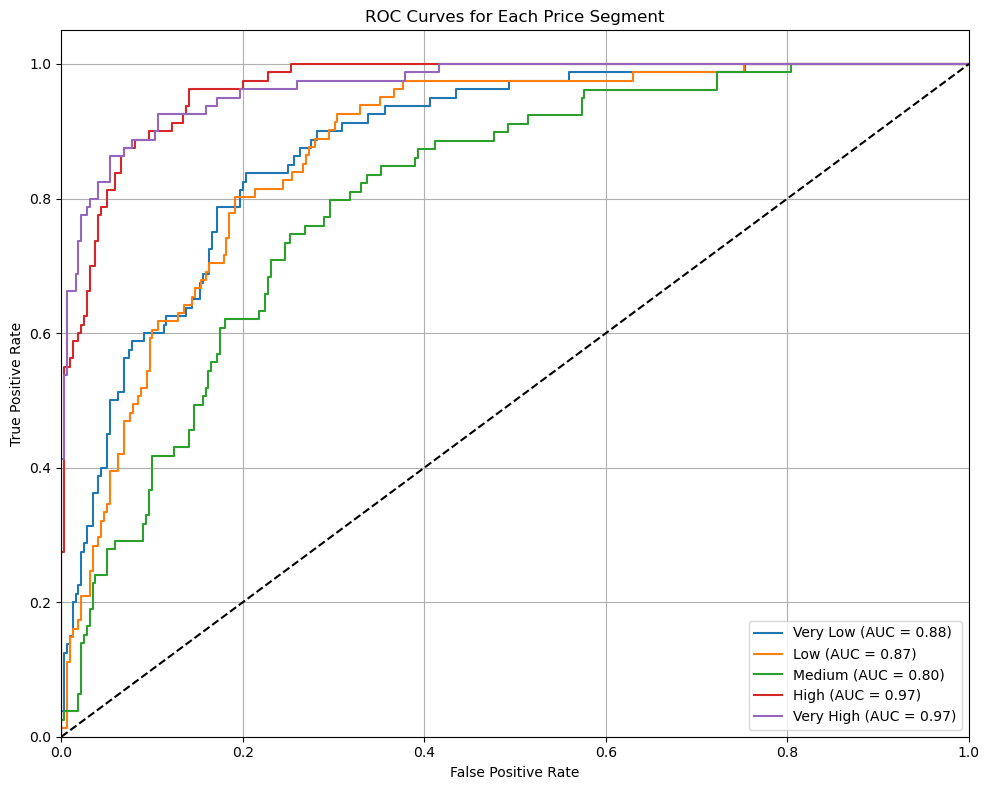

In [35]:
from sklearn.metrics import roc_curve, auc

# Plot ROC curves
plt.figure(figsize=(10, 8))
y_prob = rf_model.predict_proba(X_test)

for i, label in enumerate(labels):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Price Segment')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# **Explanation and Justification of Predictions**

Understanding Model Performance:
- Random Forest model categorizes price segments with 0.65 overall accuracy
- High/Very High segments show strong performance (AUC = 0.97)
- Feature importance led by PC1 (41% contribution)
- Reliable segmentation shown in confusion matrix diagonal values

Prediction Importance:
1. Market Analysis: Model segments properties into five categories, enabling trend identification
2. Risk Assessment: High precision in premium segments (0.88 for Very High) aids investment decisions
3. Strategic Planning: Confusion matrix insights help optimize resource allocation
4. Customer Targeting: ROC curves (AUC 0.80-0.97) validate segment discrimination ability

# **Recommendations Based on Analysis**

Business Applications:
1. Pricing Strategy: 
   - Leverage 0.88 precision in Very High segment for premium pricing
   - Adjust pricing in Medium segment based on 0.49 precision insights

2. Resource Allocation:
   - Focus on High/Very High segments (AUC = 0.97)
   - Optimize inventory based on segment predictions

3. Risk Management:
   - Use confusion matrix for cross-segment risk assessment
   - Monitor PC1 indicators for market shifts

# **Support Vector Machine Model Training and Evaluation**

In [36]:
from sklearn.model_selection import train_test_split
#train test split (Classification & Clustering)

X = pca_df
y = y_encode

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [38]:
# Evaluation
y_pred_class = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6125


In [39]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_class))


Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.56      0.52        70
           1       0.51      0.57      0.54        86
           2       0.54      0.52      0.53        85
           3       0.79      0.70      0.74        80
           4       0.80      0.72      0.76        79

    accuracy                           0.61       400
   macro avg       0.63      0.61      0.62       400
weighted avg       0.63      0.61      0.62       400



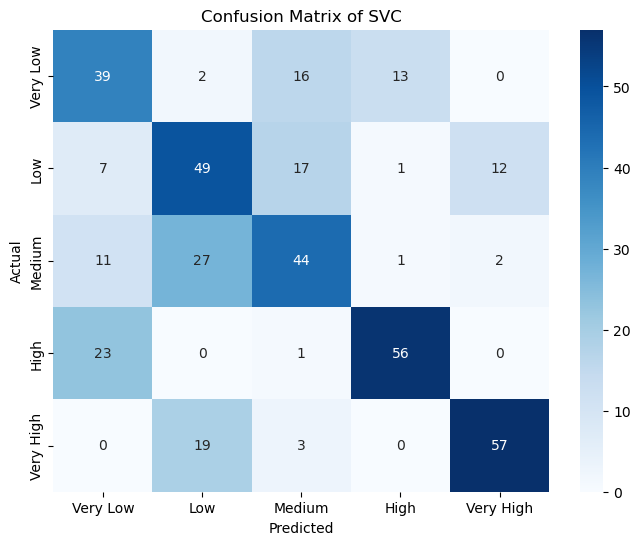

In [40]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_class)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix of SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [41]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the linear kernel
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'gamma': ['scale', 0.01, 0.1, 1, 10],  
}

grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)  
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'gamma': 1}


In [42]:
# Train the best model
best_svm = grid_search.best_estimator_
y_pred_class = best_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Best Model Accuracy: {accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred_class))

Best Model Accuracy: 0.6425

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.57      0.54        70
           1       0.56      0.62      0.59        86
           2       0.56      0.52      0.54        85
           3       0.79      0.74      0.76        80
           4       0.80      0.77      0.79        79

    accuracy                           0.64       400
   macro avg       0.65      0.64      0.64       400
weighted avg       0.65      0.64      0.64       400



In [43]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_classifier, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")

Cross-validation scores: [0.415  0.6125 0.6625 0.605  0.585 ]


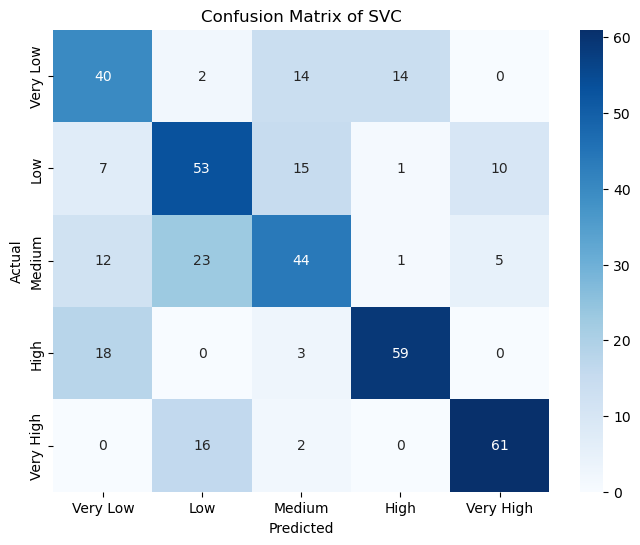

In [44]:
cm = confusion_matrix(y_test, y_pred_class)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix of SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [45]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(best_svm, X_test, y_test, n_repeats=10, random_state=42)

perm_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print("Permutation Importance:")
print(perm_importance_df)

Permutation Importance:
  Feature  Importance
0     PC1     0.34125
1     PC2     0.20600
2     PC3     0.19600
3     PC4     0.15400


Accuracy of Original Model: 0.6125
Accuracy of Best Model: 0.6425

Classification Report (Original Model):
               precision    recall  f1-score   support

           0       0.49      0.56      0.52        70
           1       0.51      0.57      0.54        86
           2       0.54      0.52      0.53        85
           3       0.79      0.70      0.74        80
           4       0.80      0.72      0.76        79

    accuracy                           0.61       400
   macro avg       0.63      0.61      0.62       400
weighted avg       0.63      0.61      0.62       400


Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.52      0.57      0.54        70
           1       0.56      0.62      0.59        86
           2       0.56      0.52      0.54        85
           3       0.79      0.74      0.76        80
           4       0.80      0.77      0.79        79

    accuracy                           

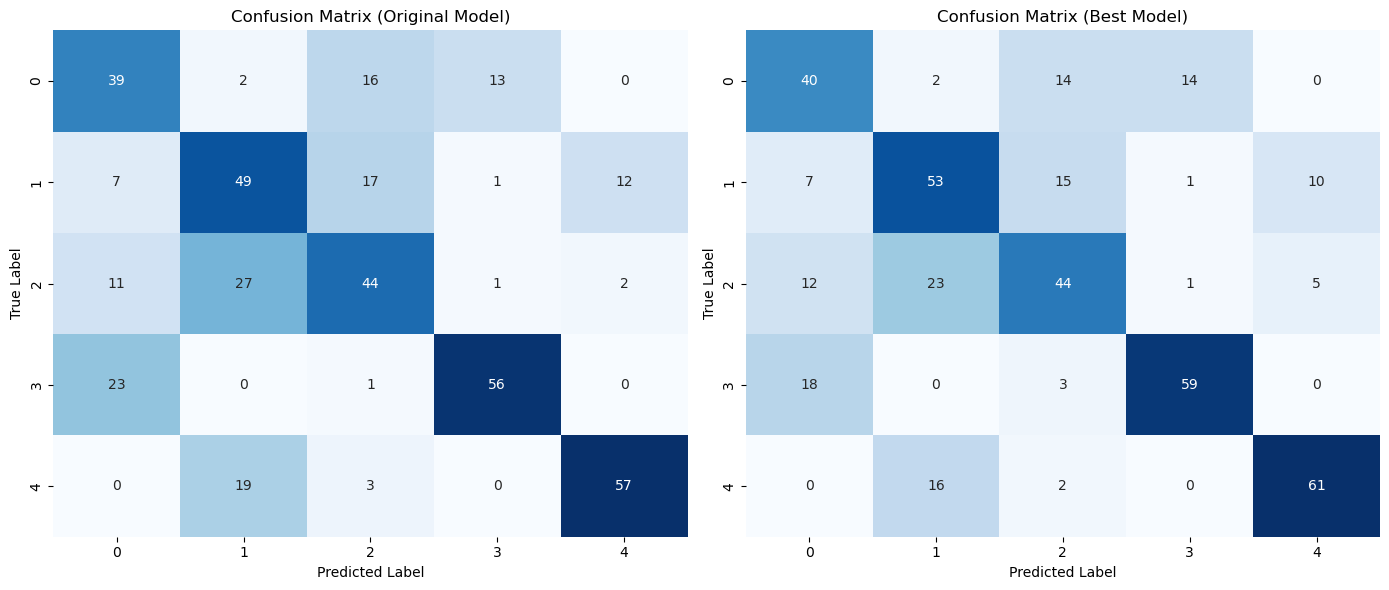


Cross-validation scores (Original Model): [0.415  0.6125 0.6625 0.605  0.585 ]
Mean CV score (Previous Model): 0.5760

Cross-validation scores (Best Model): [0.445  0.6175 0.695  0.6625 0.5875]
Mean CV score (Best Model): 0.6015


In [46]:
# Predict with the previous model
y_pred_class_prev = svm_classifier.predict(X_test)
accuracy_prev = accuracy_score(y_test, y_pred_class_prev)

# Predict with the best model
y_pred_class_best = best_svm.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_class_best)

# Print the accuracy comparison
print(f"Accuracy of Original Model: {accuracy_prev:.4f}")
print(f"Accuracy of Best Model: {accuracy_best:.4f}")

# Print classification reports for both models
print("\nClassification Report (Original Model):\n", classification_report(y_test, y_pred_class_prev))
print("\nClassification Report (Best Model):\n", classification_report(y_test, y_pred_class_best))

# Plot confusion matrices for both models
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Confusion matrix for previous model
cm_prev = confusion_matrix(y_test, y_pred_class_prev)
sns.heatmap(cm_prev, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix (Original Model)')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Confusion matrix for best model
cm_best = confusion_matrix(y_test, y_pred_class_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Confusion Matrix (Best Model)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

# Show the plots
plt.tight_layout()
plt.show()

# Compare the models' performance on cross-validation
from sklearn.model_selection import cross_val_score

cv_prev = cross_val_score(svm_classifier, X, y, cv=5, scoring='accuracy')
cv_best = cross_val_score(best_svm, X, y, cv=5, scoring='accuracy')

print("\nCross-validation scores (Original Model):", cv_prev)
print(f"Mean CV score (Previous Model): {cv_prev.mean():.4f}")

print("\nCross-validation scores (Best Model):", cv_best)
print(f"Mean CV score (Best Model): {cv_best.mean():.4f}")

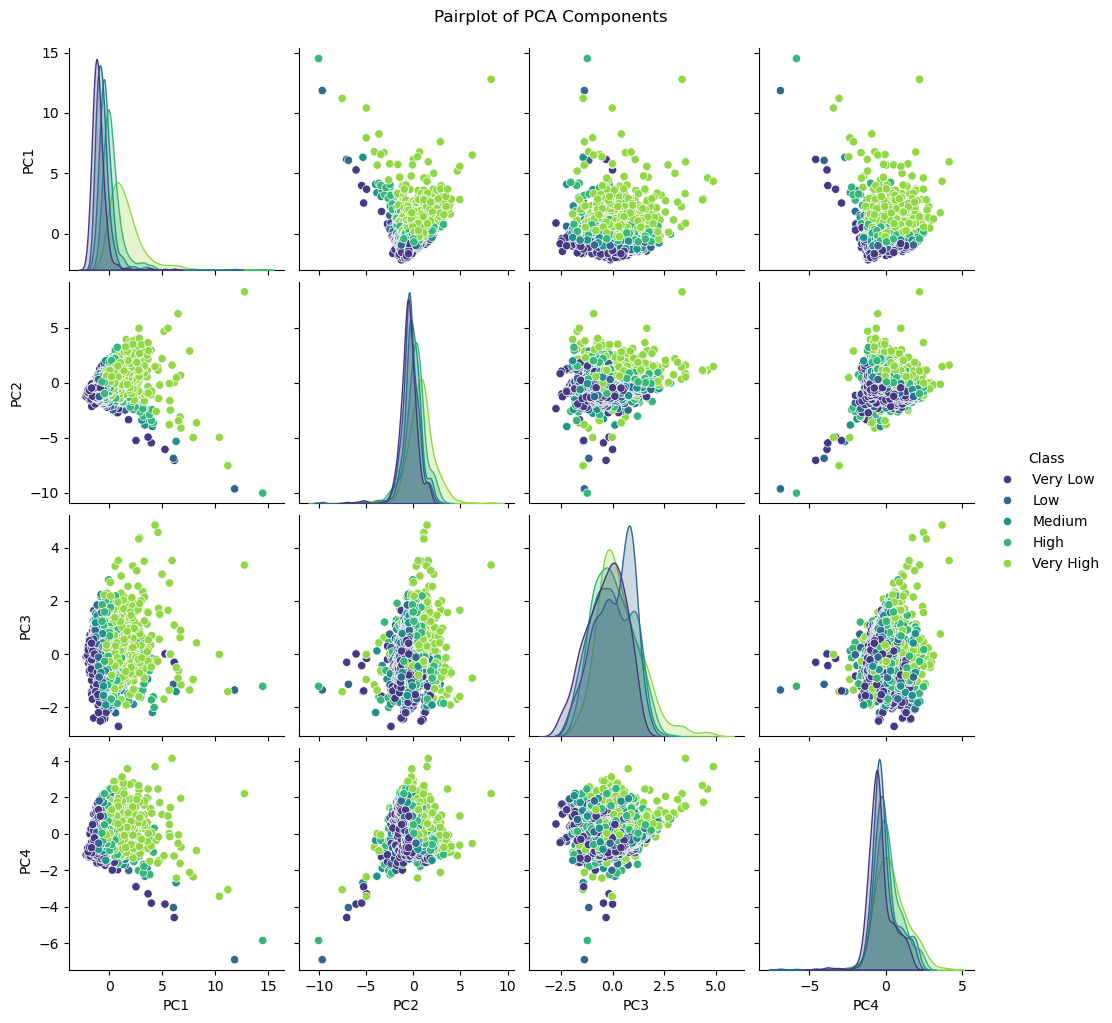

In [47]:
pca_df['Class'] = y_multiclass  

# Pairplot to visualize all 4 principal components
sns.pairplot(pca_df, hue='Class', palette='viridis', diag_kind='kde', vars=['PC1', 'PC2', 'PC3', 'PC4'])
plt.suptitle("Pairplot of PCA Components", y=1.02)
plt.show()

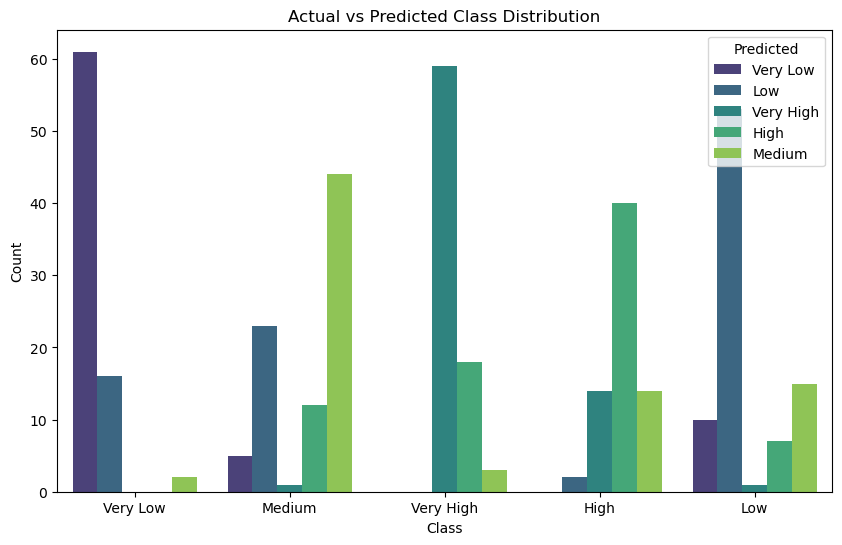

In [48]:
# Create a DataFrame for actual vs predicted values
results_df = pd.DataFrame({
    'Actual': le.inverse_transform(y_test),
    'Predicted': le.inverse_transform(y_pred_class_best)
})

# Plot the distribution of actual vs predicted classes
plt.figure(figsize=(10, 6))
sns.countplot(x='Actual', hue='Predicted', data=results_df, palette='viridis')
plt.title('Actual vs Predicted Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Predicted')
plt.show()

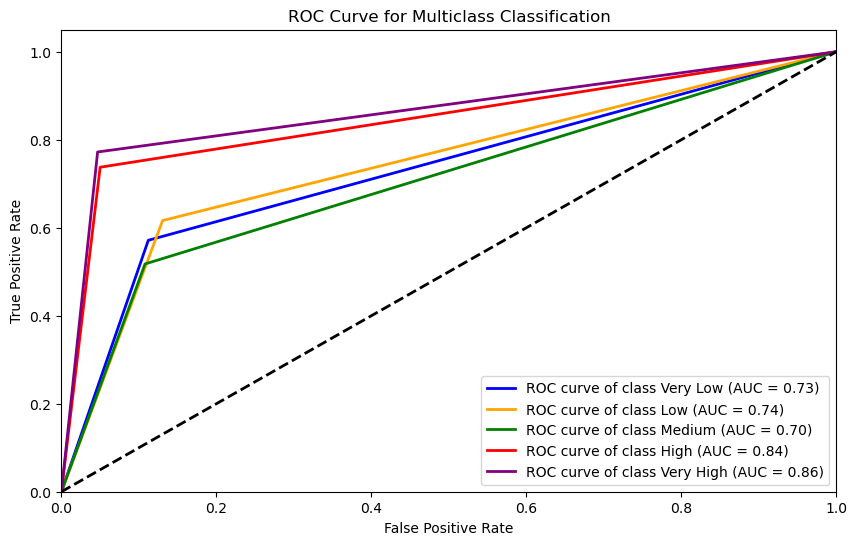

In [49]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Binarize the output for multiclass ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_bin = label_binarize(y_pred_class_best, classes=np.unique(y_test))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
colors = cycle(['blue', 'orange', 'green', 'red', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()

# Model Performance Evaluation & Justification of Predictions
Performance Overview:
1. Best Model Accuracy: 64.25% (Improved from 61.25%)
2. Higher Precision & Recall for Classes 3 and 4
3. Moderate Misclassification for Classes 0, 1, and 2

Feature Importance (Permutation Analysis):
1. PC1: 34.1% contribution → Most significant feature
2. PC2: 20.6% contribution
3. PC3: 19.6% contribution
4. PC4: 15.4% contribution

Confusion Matrix Insights:
1. Higher Accuracy in Classes 3 & 4 → More distinct separation in premium categories
2. Misclassification in Classes 0, 1, and 2 → Overlapping price ranges may cause ambiguity
3. Better generalization with optimized parameters, but some adjacent categories still overlap

Justification of Predictions:
1. PCA Effectiveness: Retained key variance in the data, improving classification
2. Linear SVC Strength: Captured clear decision boundaries in high-price categories
3. Classification Challenges: Mid-range classes (0-2) require more refined separation
4. Future Improvements:
    * Feature Engineering to enhance low-price category differentiation
    * Potential Ensemble Models for better generalization across all price classes


# Why the Predictions are Useful and Important:
1. **Classification of Price Categories:**
* Precise Classification: The model’s ability to classify properties into distinct price categories (Very Low, Low, Medium, High, Very High) helps in better understanding market segmentation and consumer behavior.
* Informed Decision Making: By identifying which properties fall under each price category, stakeholders (e.g., real estate agents, investors, homebuyers) can make informed decisions on property investments or pricing strategies.
* Targeted Marketing: Classification can aid in targeting specific customer groups based on their budget and preferences, enhancing marketing efforts and resource allocation for sellers.
2. **Performance & Market Insights:**
* Price Range Predictions: The model can predict market trends and consumer interest for properties across different price ranges. This helps businesses optimize their product offerings based on consumer demand.
* Strategic Adjustments: If the model indicates higher misclassifications in certain price categories (e.g., Medium), it suggests that additional features or improvements could be made to better capture trends in those ranges, ensuring that predictions align more closely with real market data.
3. **Market Segmentation & Trend Forecasting:**
* Market Insights: The predictions allow for a clearer segmentation of the market, which is crucial for forecasting long-term trends, setting future prices, and understanding the impact of external factors like economic conditions or inflation.
* Investor Insights: Investors looking for high-growth opportunities can use the model to spot high-demand areas (e.g., properties in the "Very High" range), potentially leading to better investment returns.

# Applications
1. **Use the Predictions for Business Strategy:**
* Market Adaptation: Real estate companies can use the model to adjust property pricing dynamically based on predictive insights from the model.
* Price Adjustment Strategy: Implement the model to suggest price adjustments by classifying properties into their corresponding categories, which can be used to optimize profitability and attract buyers based on price trends.
* Targeted Campaigns: Target specific customer groups with marketing strategies based on predicted property classifications. This could enhance advertising efficiency, consumer engagement, and conversion rates for property sales.
2. **Long-Term Market Forecasting:**
* Trend Analysis: By continuously feeding the model with new data, the predictions can help in monitoring market dynamics. Over time, the model can adjust to shifting demand and supply trends and provide up-to-date insights on the housing market.
* Price Sensitivity Analysis: Incorporating economic indicators (e.g., interest rates, inflation) into the model could provide predictive insights on how the housing market will behave in the coming months or years, helping businesses prepare for shifts in the market.

# END